In [34]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown,display,IFrame,HTML,Image
import itertools
from z3 import *
import itertools

### Puzzle as published
https://www.janestreet.com/puzzles/block-party-index/

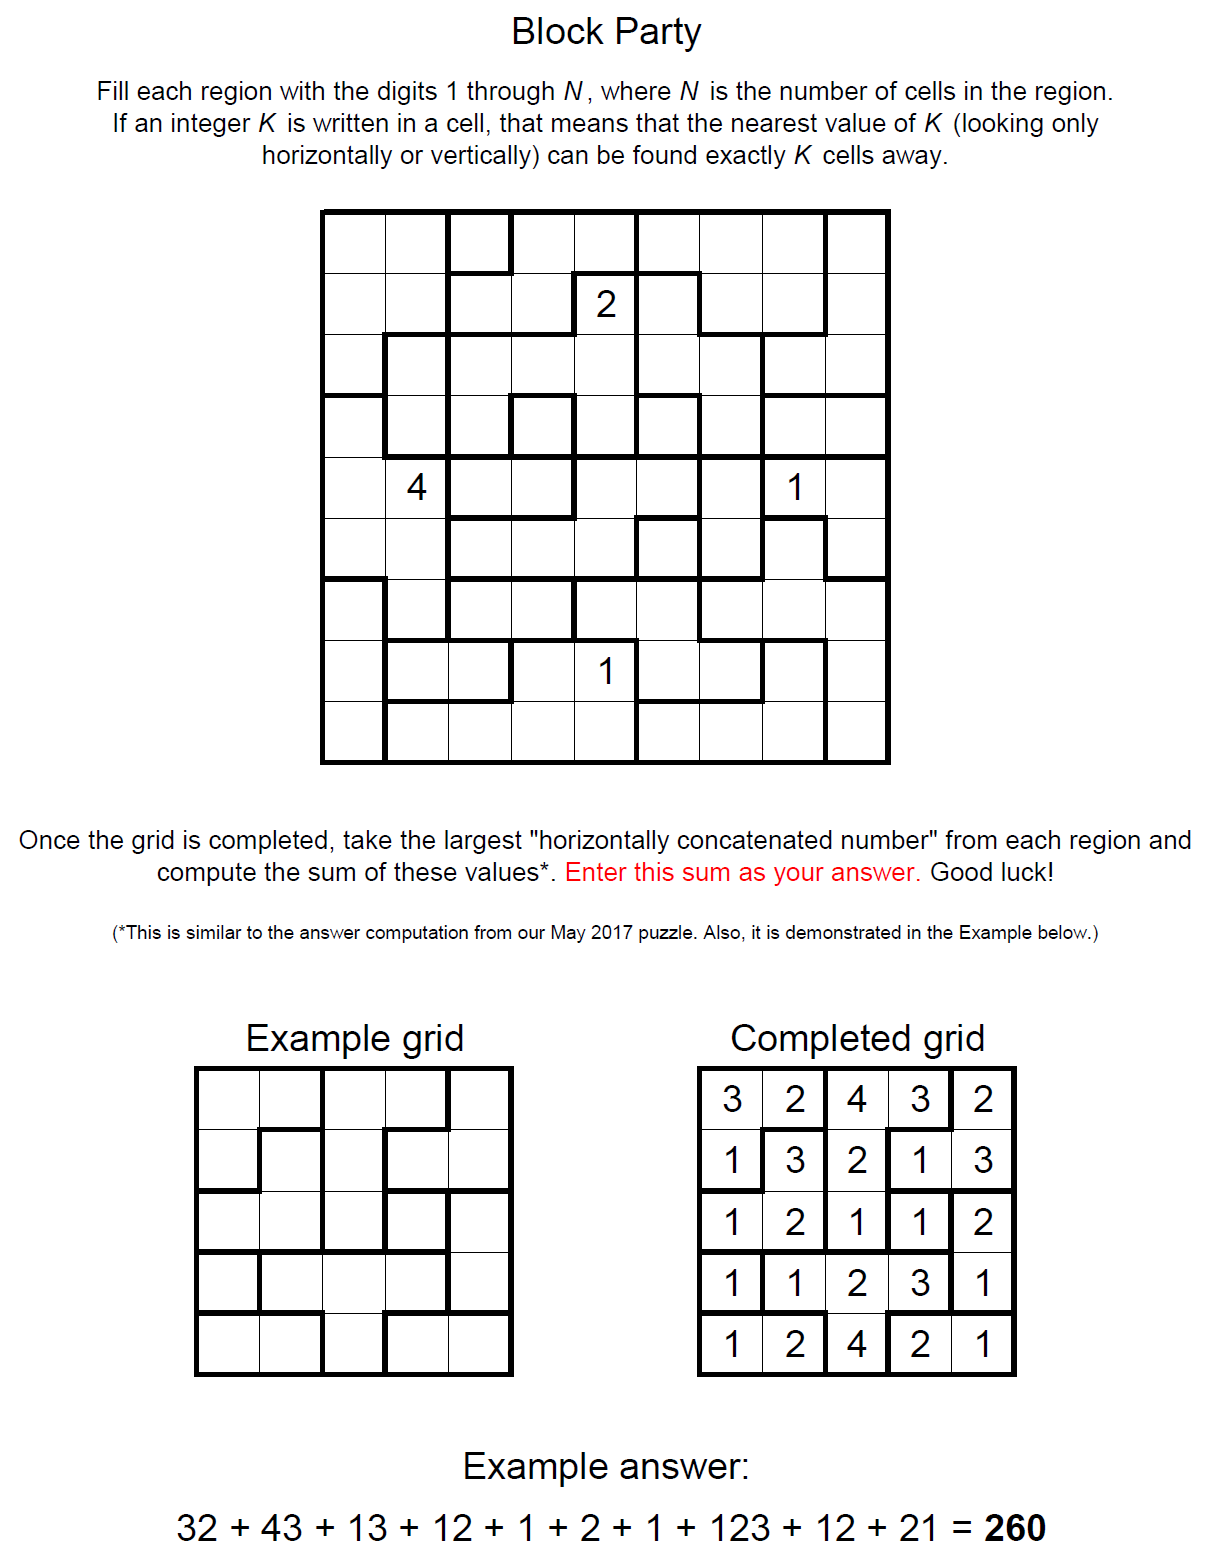

In [39]:
url='https://www.janestreet.com/puzzles/block-party-index/'
display(Markdown('### Puzzle as published\n'+url))
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Image("https://www.janestreet.com/puzzles/20171101_block_party.png",width=300))

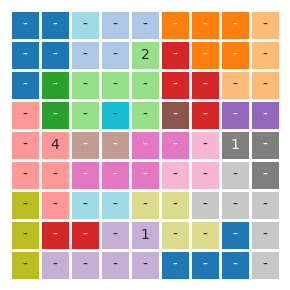

In [12]:
groups=np.array([[0 ,0 ,22,2 ,2 ,3 ,3 ,3 ,4 ],
                 [0 ,0 ,2 ,2 ,6 ,7 ,3 ,3 ,4 ],
                 [0 ,5 ,6 ,6 ,6 ,7 ,7 ,4 ,4 ],
                 [9 ,5 ,6 ,21,6 ,12,7 ,10,10],
                 [9 ,9 ,13,13,14,14,16,17,17],
                 [9 ,9 ,14,14,14,15,16,18,17],
                 [19,9 ,23,23,20,20,18,18,18],
                 [19,8 ,8 ,11,11,20,20,1 ,18],
                 [19,11,11,11,11,1 ,1 ,1 ,18]
                 ],dtype=int)

fixed =np.array([[0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,2,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,4,0,0,0,0,0,1,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,1,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0]
                 ],dtype=int)

def grid_print(groups,numbers):
    fig,ax = plt.subplots(1,1,figsize=(3,3))
    x = np.array((numbers).astype('int').astype('str'))
    x[x=="0"] ="-"
    ax = sns.heatmap(groups,annot=x,cbar=False,cmap="tab20",fmt="",linewidths=1)
    ax.axis("off")
    plt.tight_layout()
    
grid_print(groups,fixed)

In [32]:
def need(n,i,j,N):
    return [(i+a,j+b) for (a,b) in [(-n,0),(n,0),(0,n),(0,-n)] if 0<=i+a<N and 0<=j+b<N] 

def exclude(n,i,j,N):
    return [(i+a,j+b) for (a,b) in [(0,b) for b in range(-n+1,n) if b!=0] + [(a,0) for a in range(-n+1,n) if a!=0] if 0<=i+a<N and 0<=j+b<N]

def counter(groups,solved):
    group_poss = [[0] for _ in range(24)]
    group, total = 0, 0
    for i,j in itertools.product(range(9),repeat=2):  
        num = solved[i,j]
        if groups[i,j] == group:
            total *= 10
            total += num
        else:
            group_poss[group].append(total)
            group = groups[i,j]
            total = num
    return sum([max(group_poss[i]) for i in range(24)])

<h3>Solution found in 0.283523 seconds</h3>

<h3>Answer is 6647</h3>

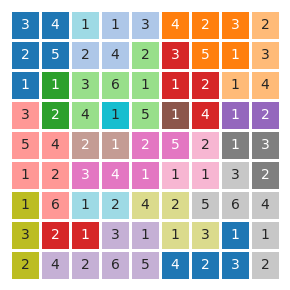

In [35]:
start = time.time()
N = fixed.shape[0]
# set up the solver and variables.
s = Tactic("qffd").solver()
X = np.array(IntVector("x",N**2),dtype=object).reshape((N,N))

#fixed cells
s += [e == int(fixed[i,j]) for (i,j),e in np.ndenumerate(X) if fixed[i,j]!=0]

# 1-n in the groups 
group_sizes = np.unique(groups,return_counts=True)[1]
for (g,z) in enumerate(group_sizes):
    s += Distinct([e for (i,j),e in np.ndenumerate(X) if groups[i,j]==g])
    s += [And(e>0,e<=int(z)) for (i,j),e in np.ndenumerate(X) if groups[i,j]==g]

# closest constraints
for n in range(np.max(group_sizes)+1):    
    s += [Implies(e == n, And([X[a,b] != n for a,b in exclude(n,i,j,N)])) for (i,j),e in np.ndenumerate(X)]
    s += [Implies(e == n, Or([X[a,b] == n for a,b in need(n,i,j,N)])) for (i,j),e in np.ndenumerate(X)]  

# solve
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    result =  evalu(X)
    grid_print(groups,result)
    display(Markdown(f"<h3>Solution found in {time.time() - start:.6f} seconds</h3>"))
    display(Markdown(f"<h3>Answer is {counter(groups,result)}</h3>"))

### Solution as published
https://www.janestreet.com/puzzles/block-party-solution/

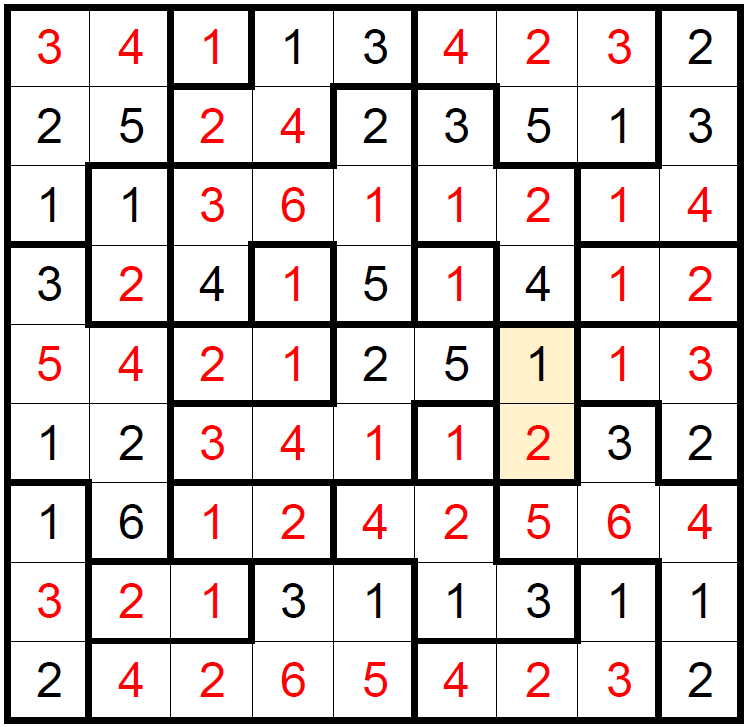

In [38]:
url='https://www.janestreet.com/puzzles/block-party-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published\n'+url))
display(Image("https://www.janestreet.com/puzzles/20171201_block_party_completed.png",width=300))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))